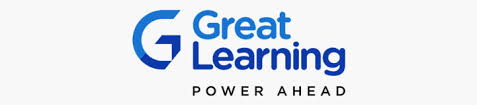

# Agenda

1. Problem Statement
2. Import Necessary Libraries
3. Load the Data
4. Data Preparation
5. Building Neural Network Model
  - Base Neural Network Model
  - Model Building with Dropout
  - Model Building with BatchNormalization & Weight initialization methods
6. Summary

## 1. Problem Statement

Given a hand written numbers dataset with training data of 60,000 images and test data of 10,000 images in a csv format. We are required to build a model which classifies these images correctly by making use of the Neural Network Concepts we have learnt.

The dataset is available [here](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?)

## 2. Import Necessary Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split # Split data to train and test data(after merging in this case)
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
import warnings
warnings.filterwarnings('ignore')


# import libraries from tensorflow
from tensorflow import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform

## 3. Load the data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train[10][10][11:20]

array([  0,   0,  24, 209, 254, 254, 254, 171,   0], dtype=uint8)

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## 4. Data Preparation

In [ ]:
# Split the train data into train and val set
X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train, test_size=0.2,random_state=28)

In [ ]:
# Checking the shape of data
X_train.shape,X_val.shape, Y_train.shape,Y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [ ]:
X_train[0].shape

(28, 28)

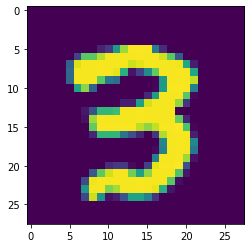

In [ ]:
plt.imshow(X_train[1000]) ## cmap='gray'

In [ ]:
Y_train[1000] ##Verify the label

3

In [ ]:
X_train_std= X_train.astype('float32') #Modifying the datatype
X_val_std= X_val.astype('float32')
X_train_std /= 255 # Scaling X_train and X_test
X_val_std /=255

In [ ]:
X_test_std= x_test.astype('float32')
X_test_std = x_test/255

In [ ]:
X_train_std[10][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.60784316, 0.99215686,
       0.8862745 , 0.11372549, 0.        , 0.        , 0.        ,
       0.        , 0.39215687, 0.99215686, 0.9411765 , 0.2784314 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [ ]:
## One hot encoding of the target columns
Y_train_cat=tf.keras.utils.to_categorical(Y_train)
Y_val_cat=tf.keras.utils.to_categorical(Y_val)

In [ ]:
Y_test_cat=tf.keras.utils.to_categorical(y_test)

## 5. Building the Neural Network Model

### 5.1 Base Neural Network Model 

#### Create a Deep Neural Network Model for Classification
- Initialize a Sequential model
- Reshape the 28X28 images into 1d array with 784 features
- Add a hidden layer
- Add a Dense layer with 10 neuron as output, use activation softmax

The output layer has **number of neurons = number of classes** if activation is softmax.

Softmax is used for multi-class classification

In [ ]:
#Intialize the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [ ]:
#Hidden layers
model.add(tf.keras.layers.Dense(32, activation='sigmoid'))

#model.add(tf.keras.layers.Dense(64, activation=tf.keras.layers.ReLU()))

In [ ]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


#### Compile the model
- Use `categorical_crossentropy` loss 
- Use `adam` optimizer with learning rate = 0.002 and train the network. 

#### Also add callback, 
- such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy'])

#### Train your model, use test data as validation set
- epochs = 20
- batch size = 32

In [ ]:
# Fitting the model
train = model.fit(X_train_std, Y_train_cat, 
                  validation_data=(X_val_std,Y_val_cat), 
                  epochs=20,batch_size=32,
                  callbacks=callback)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4852 - accuracy: 0.8826 - val_loss: 0.2709 - val_accuracy: 0.9248
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2275 - accuracy: 0.9359 - val_loss: 0.2154 - val_accuracy: 0.9372
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1802 - accuracy: 0.9482 - val_loss: 0.1858 - val_accuracy: 0.9439
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1527 - accuracy: 0.9564 - val_loss: 0.1656 - val_accuracy: 0.9518
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1321 - accuracy: 0.9622 - val_loss: 0.1552 - val_accuracy: 0.9545
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1162 - accuracy: 0.9660 - val_loss: 0.1466 - val_accuracy: 0.9567
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1042 - accuracy: 0.9699 - val_loss: 0.1389 - val_accuracy:

In [ ]:
# Predicting X_test basis the built model
y_pred = np.argmax(model.predict(X_test_std), axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 966,    0,    0,    2,    1,    4,    3,    1,    2,    1],
       [   0, 1121,    3,    2,    0,    1,    2,    1,    5,    0],
       [   9,    1,  984,    6,    8,    2,    2,    8,   11,    1],
       [   0,    0,   10,  965,    2,    7,    0,    8,   14,    4],
       [   0,    0,    2,    0,  943,    0,   11,    1,    1,   24],
       [   4,    2,    1,   17,    3,  836,   15,    1,    9,    4],
       [   9,    3,    5,    0,    3,    3,  933,    0,    2,    0],
       [   1,    3,   12,    8,    4,    1,    0,  986,    2,   11],
       [   7,    2,    4,    9,    4,    4,    7,    6,  928,    3],
       [   5,    5,    0,   10,   18,    4,    1,    6,    4,  956]])

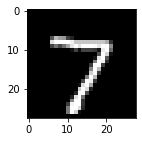

Actual Label: 7
Predicted Label: 7
-----------X--------------


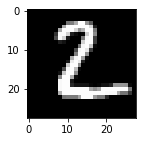

Actual Label: 2
Predicted Label: 2
-----------X--------------


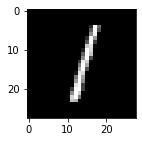

Actual Label: 1
Predicted Label: 1
-----------X--------------


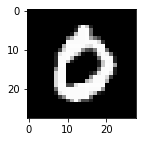

Actual Label: 0
Predicted Label: 0
-----------X--------------


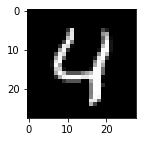

Actual Label: 4
Predicted Label: 4
-----------X--------------


In [ ]:
# validaitng the prediction that is run on X-test after model building with the actual values in X_test
for i in range(5): 
  plt.figure(figsize=(2,2))
  plt.imshow(X_test_std[i], cmap='gray')
  plt.show()
  print('Actual Label:',y_test[i])
  
  print('Predicted Label:',y_pred[i])
  print('-----------X--------------')

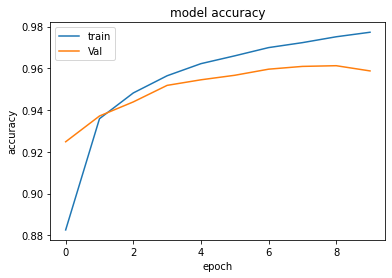

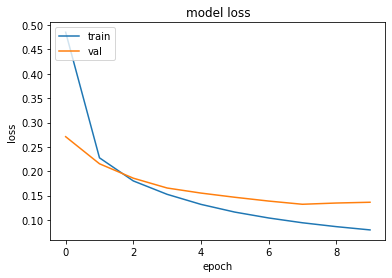

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 5.2 Model Building with dropout

In [ ]:
#Intialize the model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Hidden layers
model2.add(tf.keras.layers.Dense(128, activation=LeakyReLU()))

#Dropout layer
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(256, activation=LeakyReLU()))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(128, activation=LeakyReLU()))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(64, activation=LeakyReLU()))
model2.add(tf.keras.layers.Dropout(0.15))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)              

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5,restore_best_weights=True)

In [ ]:
# Fitting the model
train2 = model2.fit(X_train_std, Y_train_cat, 
                  validation_data=(X_val_std,Y_val_cat), 
                  epochs=10,batch_size=32,
                  callbacks=callback)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3436 - accuracy: 0.8923 - val_loss: 0.2000 - val_accuracy: 0.9373
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1985 - accuracy: 0.9402 - val_loss: 0.1477 - val_accuracy: 0.9573
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1678 - accuracy: 0.9481 - val_loss: 0.1352 - val_accuracy: 0.9602
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1478 - accuracy: 0.9549 - val_loss: 0.1314 - val_accuracy: 0.9622
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1361 - accuracy: 0.9581 - val_loss: 0.1244 - val_accuracy: 0.9647
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1240 - accuracy: 0.9617 - val_loss: 0.1250 - val_accuracy: 0.9621
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1172 - accuracy: 0.9637 - val_loss: 0.1018 - val_accuracy:

In [ ]:
y_pred_dropout = np.argmax(model2.predict(X_test_std), axis=1)
y_pred_dropout

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dropout)

array([[ 964,    1,    1,    1,    1,    0,    3,    3,    1,    5],
       [   0, 1123,    4,    0,    0,    1,    2,    1,    4,    0],
       [   3,    1, 1015,    1,    2,    0,    3,    5,    2,    0],
       [   0,    0,   16,  981,    1,    6,    0,    1,    3,    2],
       [   1,    3,    2,    0,  943,    0,   14,    2,    3,   14],
       [   3,    0,    1,   19,    2,  846,   11,    4,    3,    3],
       [   7,    3,    0,    0,    2,    2,  943,    0,    1,    0],
       [   2,    6,   11,    4,    1,    0,    0,  998,    2,    4],
       [  11,    3,    4,   12,    3,    5,    7,    3,  924,    2],
       [   3,    5,    0,   12,    7,    1,    2,    8,    9,  962]])

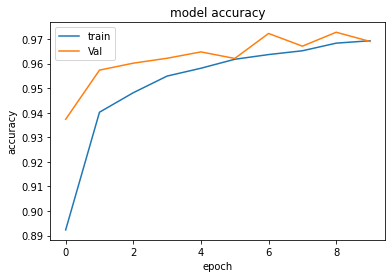

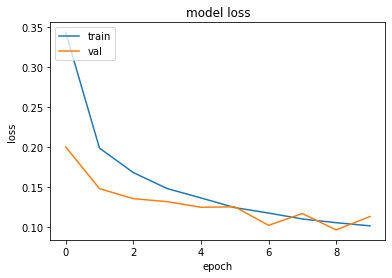

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train2.history['accuracy'])
plt.plot(train2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train2.history['loss'])
plt.plot(train2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- In the above, after implementing dropout to our model,  the test accuracy is around 0.97. 
- The model is better in this case.

### 5.3 Model Building with Batch Normalization and other hyperparameters



#### Create another Deep Neural Network Model for classsification to experiment with other hyper-parameters.
- Initialize a Sequential model
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 respectively)
- Add dropout layer after each hidden layer except the last hidden layer,  p=0.15,0.10,0.05, 0 respectively

In [ ]:
#Intialize the model
model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#add new layer
model_3.add(Dense(256,activation='relu', kernel_initializer=HeUniform(seed=7)))
# BN for regularization to prevent overefitting
model_3.add(BatchNormalization(momentum=0.6))

model_3.add(Dense(128, activation='relu',kernel_initializer=HeUniform(seed=7)))
model_3.add(BatchNormalization(momentum=0.6))

model_3.add(Dense(64, activation='relu',kernel_initializer=HeUniform(seed=7)))
model_3.add(BatchNormalization(momentum=0.6))

model_3.add(Dense(32, activation='relu',kernel_initializer=HeUniform(seed=7)))

#Output layer
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_36 (Dense)            (None, 64)               

In [ ]:
chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5,restore_best_weights=True)

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
train_3 = model_3.fit(X_train_std,Y_train_cat,          
          validation_data=(X_val_std,Y_val_cat),
          epochs=40, batch_size=32, callbacks=[callback,chkpt])

Epoch 1/40
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3533 - accuracy: 0.8973 - val_loss: 0.1416 - val_accuracy: 0.9578
Epoch 2/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1426 - accuracy: 0.9566 - val_loss: 0.1077 - val_accuracy: 0.9662
Epoch 3/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1010 - accuracy: 0.9693 - val_loss: 0.1044 - val_accuracy: 0.9679
Epoch 4/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0811 - accuracy: 0.9742 - val_loss: 0.0874 - val_accuracy: 0.9737
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0719 - accuracy: 0.9762 - val_loss: 0.0895 - val_accuracy: 0.9756
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0593 - accuracy: 0.9809 - val_loss: 0.0886 - val_accuracy: 0.9760
Epoch 7/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0519 - accuracy: 0.9827 - val_loss: 0.0860 - val_accuracy:

In [ ]:
y_pred_BN = model_3.predict(X_test_std)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 966,    0,    0,    2,    1,    4,    3,    1,    2,    1],
       [   0, 1121,    3,    2,    0,    1,    2,    1,    5,    0],
       [   9,    1,  984,    6,    8,    2,    2,    8,   11,    1],
       [   0,    0,   10,  965,    2,    7,    0,    8,   14,    4],
       [   0,    0,    2,    0,  943,    0,   11,    1,    1,   24],
       [   4,    2,    1,   17,    3,  836,   15,    1,    9,    4],
       [   9,    3,    5,    0,    3,    3,  933,    0,    2,    0],
       [   1,    3,   12,    8,    4,    1,    0,  986,    2,   11],
       [   7,    2,    4,    9,    4,    4,    7,    6,  928,    3],
       [   5,    5,    0,   10,   18,    4,    1,    6,    4,  956]])

- In the above model built with Batch Normalization we see that the training accuracy is 0.99 and the test accuracy is 0.98. 
- With batch normalization we see that both the train and test accuracy is better than the previous 2 models.

Text(0.5, 1.0, 'Training and validation loss')

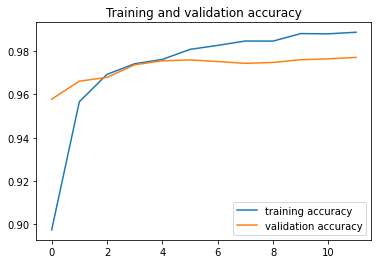

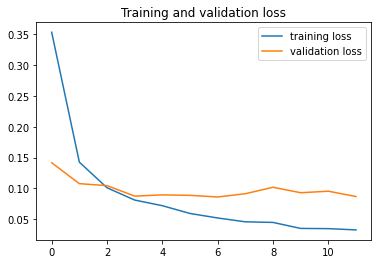

In [ ]:
accuracy = train_3.history['accuracy']
val_accuracy = train_3.history['val_accuracy']
loss = train_3.history['loss']
val_loss = train_3.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

## 6. Summary

- In this notebook we have seen the different parameters and hyperparamters we use while building a model (Base model, model with dropout and model with batch normalization).

- Amongst all the models we built we have seen that model with batch normalization and weight initialization methods shows better results than the rest.